<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [2]:
library("MASS") # For lda
library("caret") # For the dataset
data(GermanCredit)
# 'credit' is the reduced version that we will be working with
credit.all <- GermanCredit[,c(10, 1:9, 11:13, 16:19)]
set.seed(123)
credit.idx <- sample(2, nrow(credit.all), replace=TRUE, prob=c(4/5, 1/5))

credit.train <- credit.all[credit.idx==1,]
credit.test <- credit.all[credit.idx==2,]
head(credit.train)
str(credit.train)

Loading required package: lattice
Loading required package: ggplot2


,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
1,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
2,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
3,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
6,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
7,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0
9,Good,12,3059,2,4,61,1,1,1,1,0,0,0,0,1,0,0


'data.frame':	802 obs. of  17 variables:
 $ Class                         : Factor w/ 2 levels "Bad","Good": 2 1 2 2 2 2 1 1 2 1 ...
 $ Duration                      : int  6 48 12 36 24 12 30 48 12 24 ...
 $ Amount                        : int  1169 5951 2096 9055 2835 3059 5234 4308 1567 1199 ...
 $ InstallmentRatePercentage     : int  4 2 2 2 3 2 4 3 1 4 ...
 $ ResidenceDuration             : int  4 2 3 4 4 4 2 4 1 4 ...
 $ Age                           : int  67 22 49 35 53 61 28 24 22 60 ...
 $ NumberExistingCredits         : int  2 1 1 1 1 1 2 1 1 2 ...
 $ NumberPeopleMaintenance       : int  1 1 2 2 1 1 1 1 1 1 ...
 $ Telephone                     : num  0 1 1 0 1 1 1 1 0 1 ...
 $ ForeignWorker                 : num  1 1 1 1 1 1 1 1 1 1 ...
 $ CheckingAccountStatus.lt.0    : num  1 0 0 0 0 0 0 1 0 1 ...
 $ CheckingAccountStatus.0.to.200: num  0 1 0 0 0 0 1 0 1 0 ...
 $ CheckingAccountStatus.gt.200  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CreditHistory.ThisBank.AllPaid: num  0 0 0 0 0 

<h3>Q.1. Show a boxplot of the age of the person asking for the credit vs. their credit worthiness for the training data. Is age a good predictor of the credit worthiness?</h3>

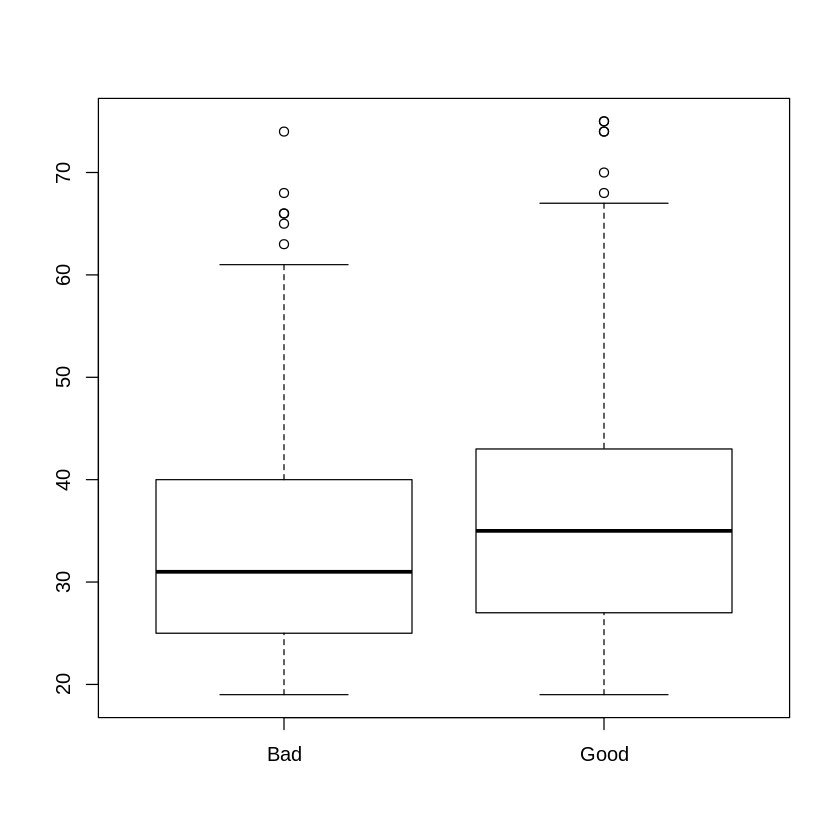

In [3]:
# Put the command (or commands) here that would give an answer to the above question.
boxplot(credit.train$Age~credit.train$Class)
# Comment whether age is a good predictor
# No, I don't think age is a good predictor for credit worthiness, as difference 
# between two classes on box plots are barely different. For most ages out of this 
# training set (esp. starting from 25 till 40) person equally likely may be assigned
# to any of two classes

<h3>Q.2. Can you generate a table that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

In [6]:
# Command:
table(credit.train$Class, credit.train$CreditHistory.Critical)

# One sentence summary:
# ratio is 0.65% for non-critical credit history (good / good + bad)
# 0.84% for critical credit history
# so, given this data one can say that person with critical credit 
# history is more credit worthy. This makes no common sense, so 
# it means that critical history as the only predictor is not good 
# for a model

      
         0   1
  Bad  196  37
  Good 371 198

<h3>Q.3. Generate a logistic regression model that uses the data. Summarize the data with a command. </h3>

In [8]:
# Command(s):
credit.glm <- glm(Class~.
                  -ResidenceDuration
                  -NumberPeopleMaintenance
                  -Telephone
                  -CreditHistory.ThisBank.AllPaid
                  -NumberExistingCredits
                  -CheckingAccountStatus.0.to.200,
                  data=credit.train,
                  family=binomial)
# Summarize:
 summary(credit.glm)

#in current model I used backward selection method to get rid from 
#insignificant features (the ones with large p-value).
#I also got rid of features that may be represented via others 
# to avoid colliniarity (like CheckingAccountStatus.0.to.200)


Call:
glm(formula = Class ~ . - ResidenceDuration - NumberPeopleMaintenance - 
    Telephone - CreditHistory.ThisBank.AllPaid - NumberExistingCredits - 
    CheckingAccountStatus.0.to.200, family = binomial, data = credit.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3147  -0.9038   0.5535   0.7620   1.9046  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   2.310e+00  8.872e-01   2.604 0.009226 ** 
Duration                     -1.850e-02  8.976e-03  -2.061 0.039277 *  
Amount                       -7.758e-05  3.965e-05  -1.957 0.050405 .  
InstallmentRatePercentage    -2.431e-01  8.672e-02  -2.803 0.005062 ** 
Age                           2.127e-02  8.053e-03   2.641 0.008264 ** 
ForeignWorker                -1.448e+00  7.640e-01  -1.895 0.058110 .  
CheckingAccountStatus.lt.0   -1.357e+00  1.893e-01  -7.167 7.68e-13 ***
CheckingAccountStatus.gt.200 -3.969e-01  3.605e-01  -1.101 0.2708

<h3>Q.4. Do values of the coefficients for CreditHistory.Critical agree with your conclusion from Q.3?</h3>

In [9]:
# One-two sentences.
# Since CreditHistory.Critical coefficient is positive 
# it has positive influence on credit worthiness (but not linear).
# Honestly I'm having hard time explaining why it may have happened: 
# I looked for original data set and explanation of criticallness. It means
# critical history OR other opened credits in different banks. Overall, other 
# opened credits may have positive influence (for example, other organizations 
# did background check and decided person is credit worthy). Or the facts that
# person has opened credits in other banks may mean he want to refinance his 
# credit which is also acceptable.
# I think the problem here may be in data itself. It may be worth to split 
# bad credit history from opened accounts for less confusion. But these two features 
# may be intentionally merged together (as we saw in example of radio x TV in sales 
# dataset) or because it has high collinearity.

<h3>Q.5. Using the developed model, predict the values in credit.test and use it to output a confusion matrix.</h3>

In [13]:
# Command that outputs probability for each row of credit.test
credit.pred <- predict(credit.glm, credit.test, type="response") 
# Command(s) for confusion matrix
table(credit.pred >= 0.5, credit.test[,'Class'])

       
        Bad Good
  FALSE  24   14
  TRUE   43  117

<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [14]:
# Command that outputs accuracy
sum(as.integer(credit.test$Class) == (as.integer(credit.pred >= 0.5) + 1)) / length(credit.test$Class)

[1] 0.7121212

<h3>Q.6. Implement a function that will calculate ROC AUC.</h3>

In [15]:
#install.packages("pROC")
library(sfsmisc)
auc <- function(cls, prob)
{
    eps <- 0.01
    x <- c()
    y <- c()
    for(pr in seq(from=0.0,to=1.0, by=eps))
    {
        table.table <- table(factor(prob >= pr, c(F, T)), cls)
        fp <- table.table['TRUE','Bad'] / (table.table['TRUE', 'Bad'] + table.table['FALSE','Bad'])
        tp <- table.table['TRUE', 'Good'] / (table.table['TRUE', 'Good'] + table.table['FALSE', 'Good'])
        y = c(y, tp)
        x = c(x, fp)
    }
    return (integrate.xy(x,y,0,1))
}

<h3>Q.7. What is the ROC AUC of the model on the test data?</h3>

In [16]:
# Command(s):
auc(credit.test[,'Class'],credit.pred)

[1] 0.723077

<h3>Q.8. Calculate LDA model on credit.train.</h3>

In [17]:
# Command
credit.lda <- lda(Class~.
                   -ResidenceDuration
                   -NumberPeopleMaintenance
                   -Telephone
                   -CreditHistory.ThisBank.AllPaid
                   -NumberExistingCredits
                   -CheckingAccountStatus.0.to.200,
                   data=credit.train)
credit.lda

Call:
lda(Class ~ . - ResidenceDuration - NumberPeopleMaintenance - 
    Telephone - CreditHistory.ThisBank.AllPaid - NumberExistingCredits - 
    CheckingAccountStatus.0.to.200, data = credit.train)

Prior probabilities of groups:
      Bad      Good 
0.2905237 0.7094763 

Group means:
     Duration   Amount InstallmentRatePercentage      Age ForeignWorker
Bad  24.69957 3888.202                  3.154506 34.20601     0.9914163
Good 19.38489 3022.954                  2.926186 36.52548     0.9525483
     CheckingAccountStatus.lt.0 CheckingAccountStatus.gt.200
Bad                   0.4506438                   0.05579399
Good                  0.1950791                   0.07205624
     CreditHistory.PaidDuly CreditHistory.Delay CreditHistory.Critical
Bad               0.5622318          0.09442060              0.1587983
Good              0.5114236          0.08787346              0.3479789

Coefficients of linear discriminants:
                                       LD1
Duration          

<h3>Q.9. Determine a confusion matrix for the LDA model calculated on the test data. What is the accuracy of the model?</h3>

In [19]:
# Predict & confusion matrix
credit.lda.pred <- predict(credit.lda, credit.test)
table(credit.lda.pred$posterior[,2]>=0.5, credit.test$Class)
# Accuracy calculation
sum(as.integer(
    credit.test$Class) == (
    as.integer(
        credit.lda.pred$posterior[,2]>=0.5) + 1)) / length(credit.test$Class)

       
        Bad Good
  FALSE  26   15
  TRUE   41  116

[1] 0.7171717

In [21]:
Sys.time() # :(

[1] "2018-01-29 01:36:28 PST"